<a href="https://colab.research.google.com/github/dpanagop/ML_and_AI_examples/blob/master/Example%20of%20image%20classification%20with%20neural%20network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Example of image classification with neural network

###First, we load the necessary libraries

In [0]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

###Then, we load Fashion MINST dataset

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


###Label number correspond to:
| Label| Class|
|---------|----------|
| 0  | T-shirt/top|
| 1  | Trouser|
| 2  | Pullover|
| 3  | Dress|
| 4  | Coat|
| 5  | Sandal|
| 6  | Shirt|
| 7  | Sneaker|
| 8  | bag|
| 9  | Ankle boot|

###We store correspondence in class_names variable

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

###We can see an example

6 3
Shirt Shirt


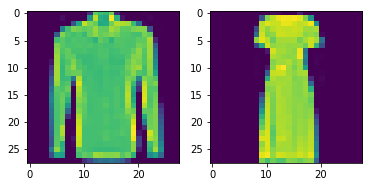

In [25]:
f, ax = plt.subplots(1,2)
ax[0].imshow(train_images[40])
ax[1].imshow(train_images[50])
print(train_labels[40],train_labels[50])
print(class_names[6],class_names[6])

###Next, we normalise data

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0


###We create a neural net

In [15]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

W0717 11:07:57.103442 140023932245888 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


###Next, compile the model

In [0]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy')

###Train model

In [17]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 4s 66us/sample - loss: 0.5176
Epoch 2/10
60000/60000 [==============================] - 3s 58us/sample - loss: 0.3963
Epoch 3/10
60000/60000 [==============================] - 3s 57us/sample - loss: 0.3601
Epoch 4/10
60000/60000 [==============================] - 3s 57us/sample - loss: 0.3375
Epoch 5/10
60000/60000 [==============================] - 3s 56us/sample - loss: 0.3170
Epoch 6/10
60000/60000 [==============================] - 3s 55us/sample - loss: 0.3045
Epoch 7/10
60000/60000 [==============================] - 3s 55us/sample - loss: 0.2915
Epoch 8/10
60000/60000 [==============================] - 3s 55us/sample - loss: 0.2834
Epoch 9/10
60000/60000 [==============================] - 3s 55us/sample - loss: 0.2718
Epoch 10/10
60000/60000 [==============================] - 3s 55us/sample - loss: 0.2644


###Predict class of second image in test dataset

In [31]:
prediction=model.predict(test_images[1].reshape(1, 28, 28))
print("Probabilities of image in each class are",prediction)
print("Highest probability in place:", prediction.argmax())
print("Image is classified as a: ",class_names[prediction.argmax()])

Probabilities of image in each class are [[9.5022015e-06 5.1667494e-12 9.8645473e-01 5.8507510e-09 1.2894193e-02
  1.9815192e-16 6.4156565e-04 5.5644159e-23 8.7376306e-10 1.6498445e-18]]
Highest probability in place: 2
Image is a:  Pullover


Actual label number is: 2
Image is a:  Pullover


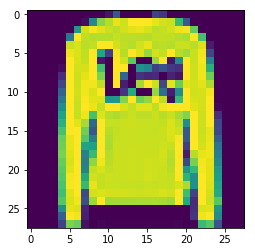

In [33]:
print("Actual label number is:",test_labels[1])
print("Image is a: ",class_names[test_labels[1]])
plt.imshow(test_images[1])


###Evaluate models accuracy

In [36]:
test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)


10000/10000 [==============================] - 0s 33us/sample - loss: 0.3568
Test accuracy: 0.3568166055083275
